# COGS 108 - Final Project

# DISCLAIMER:
This is not our originally proposed project. We decided to change the topic after submitting the original proposal where we intended to create a predictive model of the impact of expansion of trolley systems on highway rush hour traffic. We found the data necessary to make a predictive model was both sparse and would require too much time to clean. We therefore have changed our topic to one requiring less cleaning for a greater amount of data. Our team name remains as an homage to our dead project.


# Overview
Our project compares the regional crime rates and disposable household incomes to the perceived scenic value of areas of England and Wales. Previous literature has linked scenic areas to the happiness of the residents. Independent studies have determined relationships between crime rates and happiness(happy people are less likely to commit crime) as well as crime rates and wealth in wealthy countries. We therefore aim to directly compare these variables to scenery to see if there are any significant correlations between scenery to types of crime, crime overall, and the regional disposable household incomes.

# Names & Group Members IDs

- Yunan Zhang A15704964
- Woonjoon Baek A15745133
- Mazen Siddiqui A92033769
- Mische Holland A13803935
- Erika Joun A13673598
- Tiancheng Jiang A14518985

# Research Question
Is there a relation between crime rates, household disposable income, and scenery perception in England and Wales?

# Background and Prior Work
While many national statistics are readily available, it is most common for any data analysis to be of a single variable such as crime rates or income over time or between regions. Multivariable analysis is far less common but ultimately more informative. Based on the relationships shown by previous data analysts looking into the variables of perceived scenic value, crime rates, and income, we hope to expand our understanding of the relationships between these three variables. 

The inception of this project began with a recently published article in Nature where researchers quantified both scenery and happiness in regions of the UK and found a positive correlation between the two. (https://www.nature.com/articles/s41598-019-40854-6). To build on that work, we looked into other variables that could be affected by crime. In this social study,  https://journals.sagepub.com/doi/10.1177/1477370814536323, they found that happiness correlates inversely to crime, concluding happier people generally commit less crime. Knowing that scenery correlates to happiness which in turn correlates to crime, we aimed to do a direct comparison between scenery and crime. To add onto our analysis of crime, we wanted to look at possible correlations between wealth and scenery. In this other social study, https://ideas.repec.org/p/hcx/wpaper/0907.html, the researchers found that crime decreases as wealth increases, but only in wealthy countries. Since the UK is a wealthy country in the world and based on the various studies we looked at, we hoped to see some sort of correlation between income and scenery.

While our work will only show correlation and not causation, further study into the cause for correlation could lead to exciting and novel methods of governance. A shown relation between scenery and crime rates could lead to more novel crime prevention methods such as improved scenic urban planning or increased preservation of scenic areas. 



# Hypothesis
There will be a negative linear relationship between crime rates and scenery perception in the UK because scenic locations with happier people will be less prone to crime, reducing the overall crime rate of the scenic locations. There will be a negative linear relationship between scenery and household disposable income because assuming the crime rate and scenery perception hypothesis is correct, countries with greater wealth have lower rates of crime in the higher wealth brackets. The multivariate relationships of household disposable income, crime rates, and scenery perception will show a parallel relationship between household disposable income and scenery perception that is inversely correlated with crime rates.

# Datasets
For this project, we used three sets of data: scenery ratings, regional crime rates, and regional household disposable income.

#### Scenery data:
https://www.nature.com/articles/s41598-019-40854-6 <br/>
The scenery rating data was taken from the recently published paper relating happiness to scenery. The scenery rating data was gathered through an online survey in 2014 where users rated a series of photos for scenic value and is publicly available through the online published article. The original data set named votes.tsv shape is 212213 x 7 and contains ID, Lat, Lon, Average, Variance, Votes, and Geograph URI. This data did not have the location in counties so it was processed with the following webscraping code to follow the link and extract information listed on the photo details page. These new columns include:
Place - The name of the scenic site
Near - Which location the scenic site is near to, as described in the webpage
County - The county the scenic site is located in
Category - The category of scenic site (farmland, church, village, etc.)
Image - The photograph of the scenic site
Date - The date the photograph was taken

#### Web scraping code used for the scenery data:

In [25]:
# import requests
# import bs4
# from bs4 import BeautifulSoup
# import csv
# import pandas as pd

# def storeData(url, rating, variance, id_num):
# 	page = requests.get(url)
# 	soup = BeautifulSoup(page.text, features="html.parser")

# 	# Skip if page is not found
# 	header = soup(id="maincontent")[0].find('h2').getText()
# 	if header == "Sorry, page not found":
# 		print("Skipping id=" + id_num)
# 		return

# 	# Include ID
# 	print('ID: ' + str(id_num))

# 	# Retrieve place name
# 	place = soup(itemtype="schema.org/Photograph")[0].find('h2').contents[1]
# 	place = place[3:]
# 	print('Place: ' + place)

# 	# Include Rating
# 	print('Rating: ' + rating)

# 	# Include Variance
# 	print('Variance: ' + variance)

# 	# Retrieve near area (village, city, etc.)
# 	near = soup(itemprop="contentLocation")[0].findAll('b', text=True)[-1].getText()
# 	print('Near: ' + near)

# 	# Retrieve county
# 	county = soup(itemprop="contentLocation")[0].find('i', text=True).getText()
# 	county = county.split(',')[1]
# 	county = county[1:]
# 	print('County: ' + county)

# 	# Retrieve category
# 	category = soup(itemprop="keywords") or ''
# 	if category != '':
# 		category = category[0].getText()
# 	print("Category: " + category)

# 	# Retrieve image
# 	image = soup(itemprop="contentURL")[0]['src']
# 	print("Image: " + image)

# 	# Retrieve date taken
# 	dateData = soup(itemprop="exifData") or soup(itemprop="uploadDate")
# 	date = dateData[0].getText()
# 	print("Date: " + date)

# 	# Include URL
# 	print("URL: " + url)

# 	filewriter.writerow([id_num, place, rating, variance, near, county, category, image, date, url])


# # Open csv
# csvfile = open('scenery.csv', 'a', encoding='utf-8')
# filewriter = csv.writer(csvfile, lineterminator = '\n')

# # Checkpoint starts the program loop starting with that id number
# df = pd.read_csv('scenery.csv', encoding='ISO-8859-1')
# if len(df) == 0:
# 	checkpoint_id = -1
# else:
# 	#checkpoint_id = df['ID'][len(df['ID']) - 1] + 1
#         checkpoint_id = 217675

# # Store all urls and ratings
# if checkpoint_id == -1:
# 	filewriter.writerow(['ID', 'Place', 'Rating', 'Variance', 'Near', 'County', 'Category', 'Image', 'Date', 'URL'])
# with open('./votes.tsv', 'r') as fp:
# 	for count, line in enumerate(fp):
# 		if count != 0:
# 			data = line.split('\t')
# 			id_num = data[0]

# 			if int(id_num) >= checkpoint_id:
# 				rating = data[4]
# 				variance = data[3]
# 				url = data[6]
# 				storeData(url, rating, variance, id_num)
# 				print()

# fp.close()

#### Crime rate data:
https://www.ons.gov.uk/peoplepopulationandcommunity/crimeandjustice/datasets/policeforceareadatatables <br/>
The crime rate data was taken from the UK’s Office of National Statistics and lists the counts of different types of crime in 2018 by police force area in the first tab of data. The following tabs were not considered for this project because they were not raw data values and contained some longitudinal study analysis that was not relevant to the project. We did take the population data per police force from the second tab of data in order to normalize the raw crime counts data in order to properly compared between police force areas. The shape of the data with the combined population data and raw crime counts overall and by type is 43x24.

#### Income data:
https://www.ons.gov.uk/economy/regionalaccounts/grossdisposablehouseholdincome/datasets/regionalgrossdisposablehouseholdincomegdhi <br/>
The income data was taken from the UK’s Office of National Statistics and lists the average disposable household income in 2018 by region. We only took the first tab of data and the shape of that data is 40x2.

To combine these datasets, we had to convert all regions in the income data and all counties from the scenery data into police force areas in order to compare all three variables since police force area was the most broad regional category.

# Setup

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import statistics
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

# Data Cleaning
### Cleaning methods
#### Scenery data 
The webscraped data contained no errors for columns “Rating” and “County”
Contained some new lines and tabs for “Category”
Load csv into dataframe transform counties into PFA, 
#### Crime data - combine relevant data in multiple tabs into one csv, load into dataframe
Added Population column from the rate1000_crime df to number_crime df
Shortened the following column names:
“Total recorded crime (excluding fraud)” -> “Total recorded crime”
“Death or serious injury - unlawful driving” -> “Unlawful driving”</br>
We averaged the total reported numbers of crime and types of crimes. Then we normalized the data by dividing by the population count.
Code for combining and cleaning number_crime and rate1000_crime datasets:
```
crime_df = number_crime

# Add population figures column from rate1000_crime to number_crime
crime_df.insert(1, column='Population figures', value=rate1000_crime[rate1000_crime.columns[1]])

# Clean column labels
datafields = ['Area Name', 'Population figures',
'Total recorded crime', 'Violence against the person', 'Homicide',
'Violence with injury', 'Violence without injury', 'Stalking and harassment',
'Unlawful driving', 'Sexual offences', 'Robbery',
'Theft offences', 'Burglary', 'Residential burglary',
'Non-residential burglary', 'Vehicle offences', 'Theft from the person',
'Bicycle theft', 'Shoplifting', 'Other theft offences',
'Criminal damage and arson', 'Drug offences', 'Possession of weapons offences',
'Public order offences', 'Miscellaneous crimes']

number_crime.columns = datafields
```

#### Income data 
Dropped data for 2016, only keeping the data for 2017 so that it matches with all our other datasets.



In [206]:
#read the pfac data, which shows the actuall police control area of the county
pfac = pd.read_csv('../data/PFAC.csv')

#read the scenery data 
df = pd.read_csv('scenery.csv', encoding = "utf-8-sig")
print('Size of the dataset: ' + str(df.shape[0]))
# Rating and Variance are mislabeled, switch them around
df.rename(columns={'Variance': 'Rating', 'Rating': 'Variance'}, inplace=True)

#switch the colomns and rows for pfac data
pfac = pfac.transpose()
pfac.reset_index(inplace = True)

#reset the header of the pfac data
new_header = pfac.iloc[0]
pfac = pfac[1:]
pfac.columns = new_header
crime_df = pd.read_csv('../data/number_crime.csv')

#make list of crime data's column names
cols = list(crime_df)

#remove all commas from the numbers
crime_df[cols] = crime_df[cols].replace(',', '', regex = True)


print(pfac.shape[1])

Size of the dataset: 212155
43


In [107]:
#find the county
def matchCounty(area):
    for i in pfac.columns:
        if area in list(pfac[i]):
            return i
    return np.nan

In [108]:
#the unique
print('Unique counties before cleaning: ' + str(len(df['County'].unique())))

Unique counties before cleaning: 214


In [109]:
df['County'] = df['County'].apply(matchCounty)
print('Unique counties after cleaning: ' + str(len(df['County'].unique())))

Unique counties after cleaning: 44


# DATA VISUALIZATION:

Why are we using this shit?

### Bar plot:
- done to see any outliers in the rating data. Was found to be generally consistent across regions.

In [124]:
df_rate = df.drop(columns=['ID', 'Place', 'Variance', 'Near', 'Category', 'Image', 'Date', 'URL'])
df_rate = df_rate.dropna()
df_rate['Avg_Rating'] = df_rate['Rating']
df_rate['Standard_Deviation'] = df_rate['Rating']
df_rate = df_rate.drop(columns=['Rating'])
df_rate['num_pictures'] = 1


aggregation_functions = {'Avg_Rating': 'mean', 'Standard_Deviation': 'std', 'num_pictures': 'sum'}
df_rate_mean = df_rate.groupby(df_rate['County']).aggregate(aggregation_functions)
df_rate_mean.head()

Index(['County', 'Category', 'Avg_Rating', 'Standard_Deviation',
       'num_pictures'],
      dtype='object')
Index(['Avg_Rating', 'Standard_Deviation', 'num_pictures'], dtype='object')


AxesSubplot(0.125,0.125;0.775x0.755)


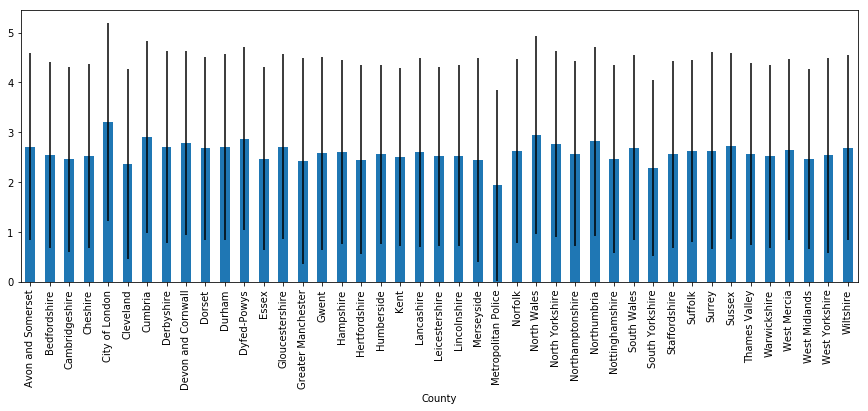

In [32]:
plot1 = df_rate_mean['Avg_Rating'].plot(figsize=(15, 5),kind='bar',yerr=df_rate_mean['Standard_Deviation'])
print(plot1)

### Scatter Matrices:

#The crime that had the highest correlation with scenery was theft, where there were less instances of theft in places with a better rating for scenery.


C:\Users\Erika\Anaconda3\envs\Python3.6\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Erika\Anaconda3\envs\Python3.6\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


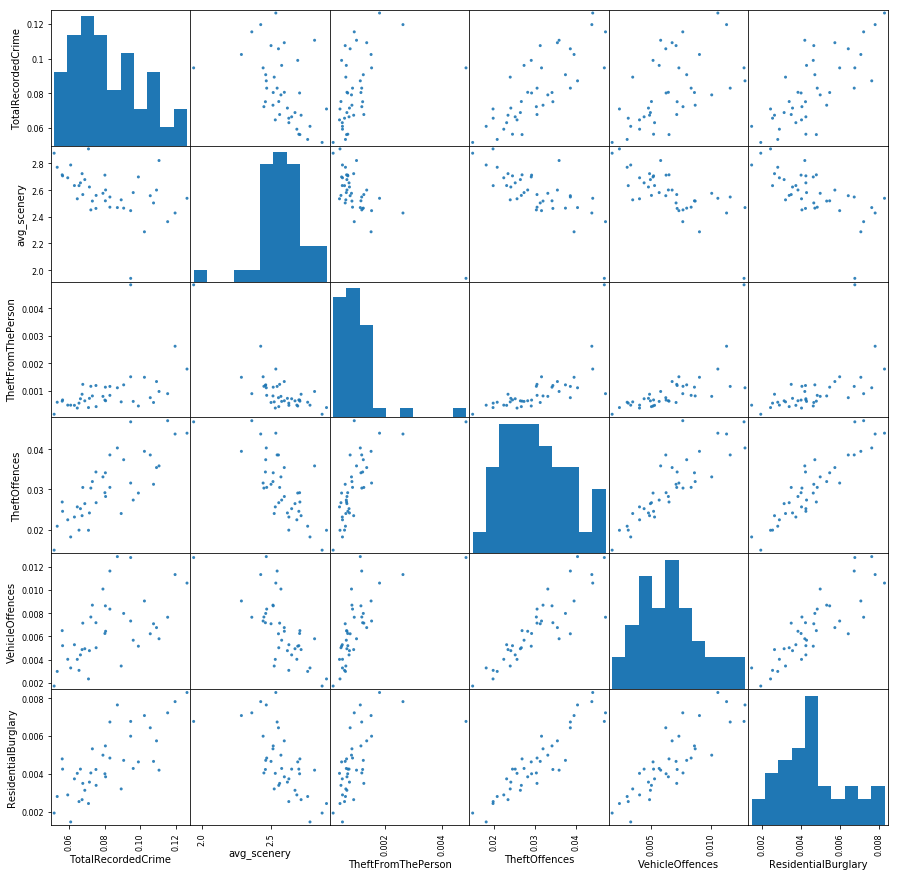

In [33]:
df_crime = pd.read_csv('../data/crime_final.csv')
df_crime.drop(df_crime.columns[0],axis=1,inplace = True)
t = df_rate_mean['Avg_Rating']
df_crime['avg_scenery'] = t

l = df_rate_mean.index.tolist()
for i in range(0,41):
   
    if df_crime.loc[i]['AreaName'] in l:     
        df_crime.set_value(i,'avg_scenery', df_rate_mean.loc[df_crime.loc[i]['AreaName']]['Avg_Rating'])
        
        

df_crime = df_crime.dropna()
#print(df_crime)
for i in range(0,41):
     for j in df_crime.columns:
        if ',' in str(df_crime.loc[i][j]):
             df_crime.set_value(i, j, df_crime.loc[i][j].replace(',' , ''))

for i in df_crime.columns:
     if i != 'AreaName':
        df_crime[i] = df_crime[i].astype(float)



#print(df_crime)
df_crime_norm = pd.DataFrame()
df_crime_norm['AreaName'] = df_crime['AreaName']
for i in df_crime.columns:
    if (i != 'AreaName') & (i != 'PopulationFigures') & (i != 'avg_scenery') & (i != 'HouseHoldfigures'):
        df_crime_norm[i] = df_crime[i] / df_crime['PopulationFigures']
        
df_crime_norm['avg_scenery'] = df_crime['avg_scenery']
df_crime_norm.head()

df_crime_norm.drop(index=27,inplace = True)
df_crime_norm.reset_index(drop=True).head()

df_crime_norm.corr()

pd.plotting.scatter_matrix(df_crime_norm.loc[:,['TotalRecordedCrime','avg_scenery','TheftFromThePerson','TheftOffences','VehicleOffences','ResidentialBurglary']],alpha = 0.9, figsize=(15,15))
plt.show()

### Geospatial:

In [34]:
map_df = gpd.read_file('../data/PFA Geospatial Analysis Stuff/Police_Force_Areas_December_2016_Full_Extent_Boundaries_in_England_and_Wales.shp')

In [35]:
df_crime['TotalCrimeNorm'] = df_crime['TotalRecordedCrime']/df_crime['PopulationFigures']
df_crime.drop(index=27,inplace = True)
merged = map_df.set_index("pfa16nm").join(df_crime.set_index("AreaName"))
merged = merged.join(df_rate_mean)

C:\Users\Erika\Anaconda3\envs\Python3.6\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  


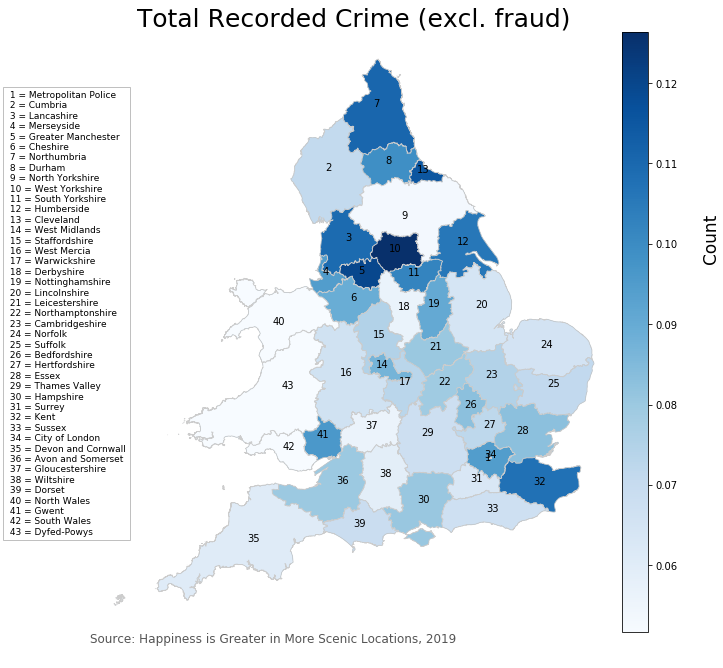

In [36]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'TotalCrimeNorm'

# set the range for the choropleth
vmin, vmax = float(min(merged[variable])), float(max(merged[variable]))

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 15))

#labeling
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
base = map_df.plot(ax = ax)
for idx, row in map_df.iterrows():
    plt.annotate(s=row['objectid'], xy=row['coords'], horizontalalignment='center', color = 'black')

# create map
merged.plot(column = variable, cmap = 'Blues', linewidth = 0.8, ax = base, edgecolor = '0.8')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax = cax1)

# remove the axis
ax.axis('off')

# add a title and y label
title = ax.set_title("Total Recorded Crime (excl. fraud)", fontdict = {'fontsize': '25', 'fontweight' : '3'})
y_axis = ax.annotate("Count", xy = (0.97, 0.66), xycoords = 'figure fraction', rotation = 'vertical',
                    fontsize = 17)

# create an annotation for the data source
ax.annotate('Source: Happiness is Greater in More Scenic Locations, 2019', xy = (0, 0), xycoords = 'axes fraction', 
            horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, color = '#555555')

# legend box for county labels
leg = pd.DataFrame()
leg['Police Force Area'] = map_df['objectid'].map(str) + ' = ' + map_df['pfa16nm']
ax.annotate(leg.to_string(formatters={'Police Force Area':'{{:<{}s}}'.format(leg['Police Force Area'].str.len().max()).format},
                          index=False, header = None), 
            xy = (0.01,0.2), xycoords = 'figure fraction', fontsize = 9, color = 'black', horizontalalignment = 'left',
            bbox=dict(facecolor='none', edgecolor='silver'))

plt.show()

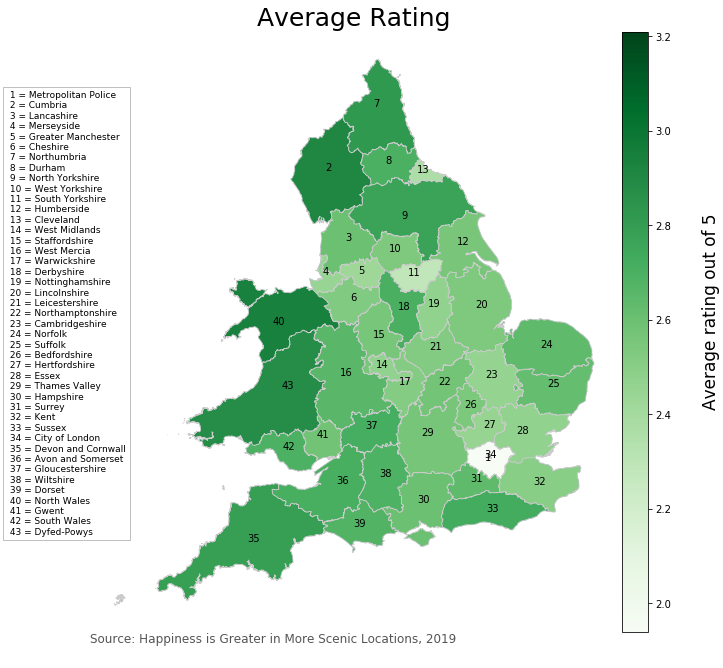

In [37]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Avg_Rating'

# set the range for the choropleth
vmin, vmax = float(min(merged[variable])), float(max(merged[variable]))

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 15))

#labeling
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
base = map_df.plot(ax = ax)
for idx, row in map_df.iterrows():
    plt.annotate(s=row['objectid'], xy=row['coords'], horizontalalignment='center', color = 'black')

# create map
merged.plot(column = variable, cmap = 'Greens', linewidth = 0.8, ax = base, edgecolor = '0.8')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax = cax1)

# remove the axis
ax.axis('off')

# add a title and y label
title = ax.set_title("Average Rating", fontdict = {'fontsize': '25', 'fontweight' : '3'})
y_axis = ax.annotate("Average rating out of 5", xy = (0.97, 0.66), xycoords = 'figure fraction', rotation = 'vertical',
                    fontsize = 17)

# create an annotation for the data source
ax.annotate('Source: Happiness is Greater in More Scenic Locations, 2019', xy = (0, 0), xycoords = 'axes fraction', 
            horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, color = '#555555')

# legend box for county labels
leg = pd.DataFrame()
leg['Police Force Area'] = map_df['objectid'].map(str) + ' = ' + map_df['pfa16nm']
ax.annotate(leg.to_string(formatters={'Police Force Area':'{{:<{}s}}'.format(leg['Police Force Area'].str.len().max()).format},
                          index=False, header = None), 
            xy = (0.01,0.2), xycoords = 'figure fraction', fontsize = 9, color = 'black', horizontalalignment = 'left',
            bbox=dict(facecolor='none', edgecolor='silver'))

plt.show()

##### comment
drop every column except 'County' and 'Rating'

calculate avg_rating and standard_deviation from 'Rating' and add 'num_pictures'

# DATA ANALYSIS & RESULTS:
### Linear model and correlation
We chose to stick to linear model analysis because when visualizing the data via scatter matrices, the points were either linearly correlated or random rather than any other type of curve or non-linear correlation.
Multivariable analysis


                            OLS Regression Results                            
Dep. Variable:     TotalRecordedCrime   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     10.62
Date:                Mon, 10 Jun 2019   Prob (F-statistic):            0.00236
Time:                        19:09:17   Log-Likelihood:                 105.98
No. Observations:                  40   AIC:                            -208.0
Df Residuals:                      38   BIC:                            -204.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2204      0.043      5.174      

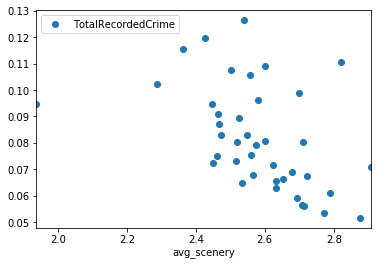

In [43]:
outcome_0, predictors_0 = patsy.dmatrices("TotalRecordedCrime ~ avg_scenery", data = df_crime_norm)
mod_0 = sm.OLS(outcome_0, predictors_0)
res_0 = mod_0.fit()
print(res_0.summary())
df_crime_norm.plot(x='avg_scenery',y='TotalRecordedCrime',style='o')

                            OLS Regression Results                            
Dep. Variable:     TheftFromThePerson   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     53.52
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           9.23e-09
Time:                        19:09:24   Log-Likelihood:                 247.60
No. Observations:                  40   AIC:                            -491.2
Df Residuals:                      38   BIC:                            -487.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0100      0.001      8.085      

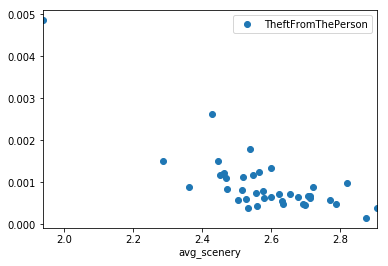

In [45]:
outcome_1, predictors_1 = patsy.dmatrices("TheftFromThePerson ~ avg_scenery", data = df_crime_norm)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())
df_crime_norm.plot(x='avg_scenery',y='TheftFromThePerson',style='o')

                            OLS Regression Results                            
Dep. Variable:          TheftOffences   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     43.84
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           8.05e-08
Time:                        19:09:24   Log-Likelihood:                 152.39
No. Observations:                  40   AIC:                            -300.8
Df Residuals:                      38   BIC:                            -297.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1186      0.013      8.883      

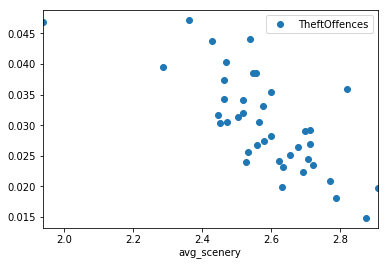

In [46]:
outcome_2, predictors_2 = patsy.dmatrices("TheftOffences ~ avg_scenery", data = df_crime_norm)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())
df_crime_norm.plot(x='avg_scenery',y='TheftOffences',style='o')

                            OLS Regression Results                            
Dep. Variable:        VehicleOffences   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     41.12
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           1.55e-07
Time:                        19:09:25   Log-Likelihood:                 193.91
No. Observations:                  40   AIC:                            -383.8
Df Residuals:                      38   BIC:                            -380.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0369      0.005      7.797      

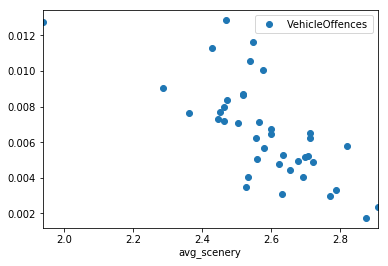

In [47]:
outcome_3, predictors_3 = patsy.dmatrices("VehicleOffences ~ avg_scenery", data = df_crime_norm)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())
df_crime_norm.plot(x='avg_scenery',y='VehicleOffences',style='o')

                             OLS Regression Results                            
Dep. Variable:     ResidentialBurglary   R-squared:                       0.436
Model:                             OLS   Adj. R-squared:                  0.421
Method:                  Least Squares   F-statistic:                     29.36
Date:                 Mon, 10 Jun 2019   Prob (F-statistic):           3.57e-06
Time:                         19:09:25   Log-Likelihood:                 210.70
No. Observations:                   40   AIC:                            -417.4
Df Residuals:                       38   BIC:                            -414.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0214      0.003      6

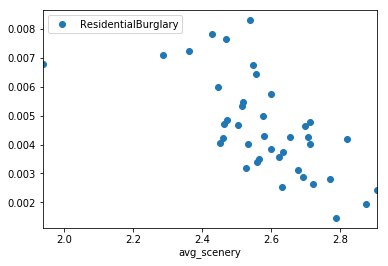

In [48]:
outcome_4, predictors_4 = patsy.dmatrices("ResidentialBurglary ~ avg_scenery ", data = df_crime_norm)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())
df_crime_norm.plot(x='avg_scenery',y='ResidentialBurglary',style='o')

                            OLS Regression Results                            
Dep. Variable:        UnlawfulDriving   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                  0.003155
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.956
Time:                        19:09:25   Log-Likelihood:                 404.95
No. Observations:                  40   AIC:                            -805.9
Df Residuals:                      38   BIC:                            -802.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.252e-05   2.42e-05      0.518      

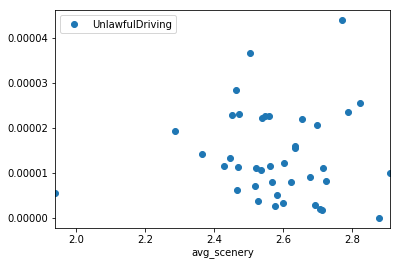

In [49]:
outcome_5, predictors_5 = patsy.dmatrices("UnlawfulDriving ~ avg_scenery", data = df_crime_norm)
mod_5 = sm.OLS(outcome_5, predictors_5)
res_5 = mod_5.fit()
print(res_5.summary())
df_crime_norm.plot(x='avg_scenery',y='UnlawfulDriving',style='o')

                            OLS Regression Results                            
Dep. Variable:         SexualOffences   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.1152
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.736
Time:                        19:09:26   Log-Likelihood:                 245.29
No. Observations:                  40   AIC:                            -486.6
Df Residuals:                      38   BIC:                            -483.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0031      0.001      2.367      

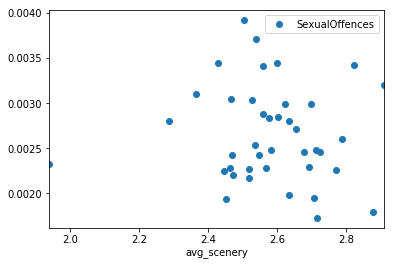

In [50]:
outcome_6, predictors_6 = patsy.dmatrices("SexualOffences ~ avg_scenery", data = df_crime_norm)
mod_6 = sm.OLS(outcome_6, predictors_6)
res_6 = mod_6.fit()
print(res_6.summary())
df_crime_norm.plot(x='avg_scenery',y='SexualOffences',style='o')

### Woonjoon

In [51]:
# df_income_table1: Total GDHI at current basic prices
income_data_file = '../data/income_table1mod.csv'
df_income = pd.read_csv(income_data_file)
df_income = df_income.drop(columns=['2016'])

#read the pfac data, which shows the actuall police control area of the county
pfac2 = pd.read_csv('../data/PFAC 2.csv')

#switch the colomns and rows for pfac data
pfac2 = pfac2.transpose()
pfac2.reset_index(inplace = True)

#reset the header of the pfac data
new_header = pfac2.iloc[0]
pfac2 = pfac2[1:]
pfac2.columns = new_header

In [52]:
#find the county
def matchCounty(area):
    for i in pfac2.columns:
        if area in list(pfac2[i]):
            return i
    return np.nan

In [53]:
# change 'Region name' to 'Police force area'
df_income['Region name'] = df_income['Region name'].apply(matchCounty)
df_income['Region name'].unique()

array(['Cleveland', 'Durham', 'Northumbria', 'Cumbria',
       'Greater Manchester', 'Lancashire', nan, 'Merseyside',
       'Humberside', 'North Yorkshire', 'South Yorkshire',
       'West Yorkshire', 'Derbyshire', 'Nottinghamshire',
       'Leicestershire', 'Northamptonshire', 'Lincolnshire',
       'West Mercia', 'Warwickshire', 'Staffordshire', 'West Midlands',
       'Cambridgeshire', 'Suffolk', 'Norfolk', 'Bedfordshire',
       'Hertfordshire', 'Essex', 'City of London', 'Metropolitan Police',
       'Thames Valley', 'Sussex', 'Surrey', 'Hampshire', 'Kent',
       'Avon and Somerset', 'Gloucestershire', 'Wiltshire',
       'Devon and Cornwall', 'North Wales', 'Gwent', 'South Wales',
       'Dyfed-Powys'], dtype=object)

In [54]:
# change 'Region name' column to 'County'
df_income['County'] = df_income['Region name']
df_income = df_income.drop(columns=['Region name'])

# sum all the same County
aggregation_functions = {'2017': 'mean'}
df_income = df_income.groupby(df_income['County']).aggregate(aggregation_functions)


In [55]:
df_income.drop(index='City of London',inplace = True)
df_income.head()

,2017
County,
Avon and Somerset,11045.0
Bedfordshire,4086.0
Cambridgeshire,8399.0
Cleveland,4353.0
Cumbria,9239.0


In [56]:
df_income.shape

(40, 1)

In [57]:
df_crime_norm['avg_income'] = df_income.values
#df_crime['avg_scenery'] = t

l = df_income.index.tolist()
for i in df_crime_norm.index.tolist():
   
    if df_crime_norm.loc[i]['AreaName'] in l:     
        df_crime_norm.set_value(i,'avg_income', df_income.loc[df_crime_norm.loc[i]['AreaName']]['2017'])

        
df_crime_norm.head()

C:\Users\Erika\Anaconda3\envs\Python3.6\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,AreaName,TotalRecordedCrime,ViolenceAgainstThePerson,Homicide,ViolenceWithInjury,ViolenceWithoutInjury,StalkingAndHarassment,UnlawfulDriving,SexualOffences,Robbery,...,BicycleTheft,Shoplifting,OtherTheftOffences,CriminalDamageAndArson,DrugOffences,PossessionOfWeaponsOffences,PublicOrderOffences,MiscellaneousCrimes,avg_scenery,avg_income
0,Cleveland,0.115502,0.035516,0.000026,0.010346,0.013200,0.011929,0.000014,0.003100,0.001026,...,0.001754,0.015661,0.011213,0.016549,0.002292,0.000666,0.006775,0.002423,2.363048,4353.0
1,Durham,0.099037,0.037949,0.000008,0.009108,0.013230,0.015583,0.000021,0.002992,0.000384,...,0.000752,0.007717,0.008503,0.015214,0.002014,0.000460,0.008160,0.002754,2.698612,4892.5
2,Northumbria,0.110653,0.033069,0.000008,0.009217,0.013794,0.010025,0.000026,0.003418,0.000590,...,0.001399,0.009720,0.011619,0.015699,0.002308,0.000961,0.016154,0.002574,2.821843,23320.0
3,Cheshire,0.089366,0.030927,0.000018,0.010046,0.012230,0.008628,0.000004,0.003031,0.000395,...,0.001496,0.006720,0.007316,0.009640,0.002068,0.000505,0.017053,0.001747,2.526800,4353.0
4,Cumbria,0.070971,0.026573,0.000008,0.009751,0.010979,0.005825,0.000010,0.003196,0.000247,...,0.000594,0.005817,0.006441,0.010951,0.002051,0.000506,0.006188,0.001439,2.908924,9239.0


In [58]:
df_crime_norm.corr()

,TotalRecordedCrime,ViolenceAgainstThePerson,Homicide,ViolenceWithInjury,ViolenceWithoutInjury,StalkingAndHarassment,UnlawfulDriving,SexualOffences,Robbery,TheftOffences,...,BicycleTheft,Shoplifting,OtherTheftOffences,CriminalDamageAndArson,DrugOffences,PossessionOfWeaponsOffences,PublicOrderOffences,MiscellaneousCrimes,avg_scenery,avg_income
TotalRecordedCrime,1.000000,0.903419,0.596562,0.723220,0.814026,0.818413,0.147078,0.736742,0.495111,0.790764,...,0.051769,0.619430,0.833660,0.825883,0.081959,0.506696,0.756837,0.870745,-0.467308,0.447633
ViolenceAgainstThePerson,0.903419,1.000000,0.434092,0.779224,0.900779,0.918736,0.177256,0.839539,0.220310,0.501103,...,-0.161332,0.511596,0.619899,0.836280,0.021416,0.342632,0.732675,0.872585,-0.220280,0.364204
Homicide,0.596562,0.434092,1.000000,0.461580,0.391666,0.326473,-0.041253,0.384165,0.558904,0.636160,...,0.155425,0.459402,0.524628,0.363961,0.080297,0.450833,0.362809,0.418590,-0.449284,0.253849
ViolenceWithInjury,0.723220,0.779224,0.461580,1.000000,0.564337,0.626285,-0.050517,0.732123,0.301651,0.473311,...,-0.219353,0.484415,0.491666,0.624100,0.022490,0.301361,0.490060,0.617124,-0.217664,0.371764
ViolenceWithoutInjury,0.814026,0.900779,0.391666,0.564337,1.000000,0.721041,0.239791,0.819622,0.221935,0.433981,...,0.006200,0.357910,0.558253,0.683246,0.002554,0.378601,0.730255,0.797445,-0.187419,0.412687
StalkingAndHarassment,0.818413,0.918736,0.326473,0.626285,0.721041,1.000000,0.189545,0.664243,0.104415,0.429286,...,-0.244217,0.521257,0.564453,0.852833,0.033025,0.225688,0.650564,0.825911,-0.186343,0.200404
UnlawfulDriving,0.147078,0.177256,-0.041253,-0.050517,0.239791,0.189545,1.000000,0.214461,-0.065522,0.085118,...,0.145760,0.167137,0.048864,0.153706,-0.119686,0.132829,0.075099,0.301767,0.009111,0.265853
SexualOffences,0.736742,0.839539,0.384165,0.732123,0.819622,0.664243,0.214461,1.000000,0.156163,0.369867,...,-0.086455,0.487462,0.512213,0.675734,-0.195834,0.344331,0.631081,0.748041,-0.054986,0.253974
Robbery,0.495111,0.220310,0.558904,0.301651,0.221935,0.104415,-0.065522,0.156163,1.000000,0.761527,...,0.201862,0.095641,0.659862,0.039844,0.183771,0.563010,0.180163,0.212535,-0.749047,0.621223
TheftOffences,0.790764,0.501103,0.636160,0.473311,0.433981,0.429286,0.085118,0.369867,0.761527,1.000000,...,0.346012,0.586433,0.868180,0.469959,0.053711,0.564830,0.339226,0.538221,-0.731890,0.453633


                            OLS Regression Results                            
Dep. Variable:            avg_scenery   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     8.006
Date:                Mon, 10 Jun 2019   Prob (F-statistic):            0.00741
Time:                        19:09:30   Log-Likelihood:                 18.342
No. Observations:                  40   AIC:                            -32.68
Df Residuals:                      38   BIC:                            -29.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6729      0.042     64.393      0.0

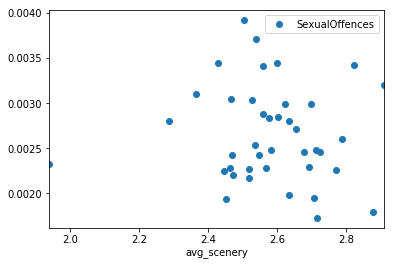

In [59]:
outcome_7, predictors_7 = patsy.dmatrices("avg_scenery ~ avg_income", data = df_crime_norm)
mod_7 = sm.OLS(outcome_7, predictors_7)
res_7 = mod_7.fit()
print(res_7.summary())
df_crime_norm.plot(x='avg_scenery',y='SexualOffences',style='o')

                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     23.88
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           1.89e-05
Time:                        19:09:31   Log-Likelihood:                 242.91
No. Observations:                  40   AIC:                            -481.8
Df Residuals:                      38   BIC:                            -478.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.000      1.975      0.0

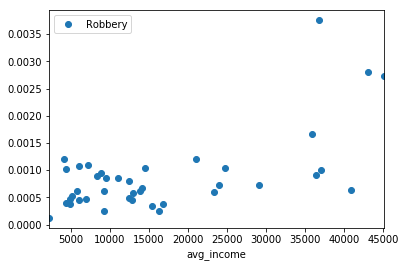

In [60]:
outcome_8, predictors_8 = patsy.dmatrices("Robbery ~ avg_income", data = df_crime_norm)
mod_8 = sm.OLS(outcome_8, predictors_8)
res_8 = mod_8.fit()
print(res_8.summary())
df_crime_norm.plot(x='avg_income',y='Robbery',style='o')

In [61]:
outcome_9, predictors_9 = patsy.dmatrices("TotalRecordedCrime ~ avg_income + avg_scenery", data = df_crime_norm)
mod_9 = sm.OLS(outcome_9, predictors_9)
res_9 = mod_9.fit()
print(res_9.summary())
# fig = plt.figure(figsize = (15,15))
# ax = Axes3D(fig, azim=-115, elev=15)
# Z = np.array(df_crime_norm["TotalRecordedCrime"]).reshape(-1,1)
# Y = df_crime_norm['avg_scenery']
# X = df_crime_norm['avg_income']
# ax.plot_surface(X, Y, Z)

                            OLS Regression Results                            
Dep. Variable:     TotalRecordedCrime   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     7.767
Date:                Mon, 10 Jun 2019   Prob (F-statistic):            0.00153
Time:                        19:09:31   Log-Likelihood:                 108.06
No. Observations:                  40   AIC:                            -210.1
Df Residuals:                      37   BIC:                            -205.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1746      0.047      3.727      

# Ethics & Privacy
We have permission to use this data for this purpose because all the data used is publically available and two datasets are publicly available census data from the Office of National Statistics. No privacy was violated by this study because all data was anonymous, free of any identifying information outside of general region, and publically available. The scenery data may have potential bias towards people of high socioeconomic status since the ratings were collected via website which required the use of a computer or at least a smartphone. The crime rate data may have inherent bias from the police system since it is possible there are less strict reporting enforcement in some regions over others. An ethical issue that may result from this study is improper assumption of causation and subsequent changes of policies in policing and/or governance that could negatively impact citizens. For example, over policing in areas of less perceived scenery without proof of scenic causation of crime in the area or criminals moving to more scenic areas with lower crime reports to avoid prosecution.

# Conclusion & Discussion
### Summarize project and analysis done <br/>
### Discuss results and significance(mention limitations)<br/>
### Impact to society<br/>
